In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:

# Load your data from the CSV file
file_path = '~/new_normalized_counts_V2.csv'
data = pd.read_csv(file_path, sep=',', index_col='Gene')
data


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V2283,V2284,V2285,V2286,V2287,V2288,V2289,V2290,V2291,V2292
Gene,,,,,,,,,,,,,,,,,,,,,
TSPAN6,157.684031,637.795684,10.695106,450.844760,409.272763,540.091935,248.704631,337.257525,709.953230,156.862052,...,18.472234,143.343961,543.687064,149.526702,651.847992,695.991019,557.317990,19.588303,338.433005,12.516795
TNMD,31.870615,0.000000,0.000000,0.606621,1.817399,0.000000,7.161599,0.000000,1.191976,5.922701,...,0.000000,7.881186,7.461510,0.584743,3.437676,1.337839,1.056723,0.000000,0.000000,0.000000
DPM1,1314.835837,696.089532,443.640146,720.593411,568.843138,789.108038,1031.416852,626.301316,678.292583,1293.359371,...,799.916160,1569.112512,1146.538116,1012.693331,688.638718,1150.293944,517.412243,182.432050,817.758703,116.162502
SCYL3,373.146134,565.572313,1048.894801,408.226276,451.928843,542.507040,386.711095,450.445631,437.869522,439.044956,...,953.830634,670.655253,795.743852,98.331608,598.429387,530.828866,459.568545,294.498717,466.927222,209.074150
FIRRM,85.006869,245.266230,128.491344,168.612149,151.641510,181.143130,140.365516,207.181694,111.868343,87.578232,...,156.619394,80.544997,222.287759,108.272769,143.279370,128.709402,122.965486,111.743131,203.572214,207.143857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HRURF,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PRRC2B,7154.637948,4739.506895,7148.119967,5966.499047,7294.414203,7617.204074,6060.124623,7352.831463,5759.700993,7492.034003,...,4533.699973,9013.633394,5877.951411,6084.072498,6279.232258,5851.784684,5435.795545,8001.455532,4331.175535,5528.781110
UGT1A3,0.000000,10.735682,0.000000,7.263442,0.000000,0.000000,0.000000,0.000000,0.000000,1.709749,...,0.000000,0.000000,0.000000,3.330319,0.000000,0.000000,0.000000,0.000000,3.364937,0.000000


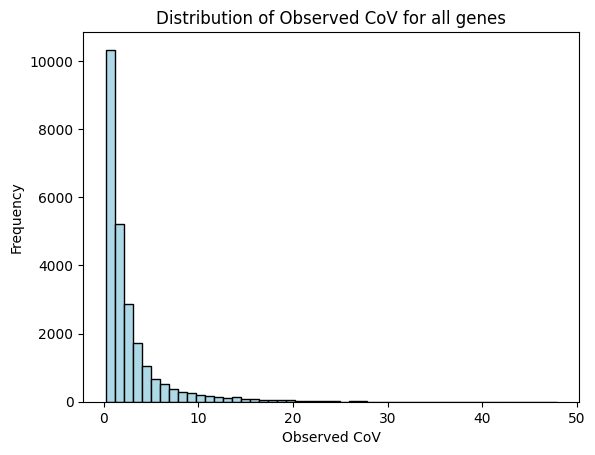

In [3]:
# Calculate observed CoV for every gene
observed_CoV = np.apply_along_axis(lambda x: np.std(x) / np.mean(x), axis=1, arr=data)

# Plot histogram of observed CoV values for all genes
plt.hist(observed_CoV, bins=50, edgecolor='black', color='lightblue')
plt.title("Distribution of Observed CoV for all genes")
plt.xlabel("Observed CoV")
plt.ylabel("Frequency")
plt.show()

In [4]:
# Set the number of permutations
num_permutations = 100000

# Initialize a DataFrame to store permuted CoV values for each gene
permuted_CoV_df = pd.DataFrame(index=data.index, columns=[f'Permutation_{i}' for i in range(1, num_permutations + 1)])

# Perform the permutation test for each gene
for i in range(num_permutations):
    # Bootstrap sampling with replacement for each gene
    bootstrapped_data = data.sample(n=data.shape[0], replace=True, axis=0)
    
    # Calculate permuted CoV for every gene
    permuted_CoV_df[f'Permutation_{i + 1}'] = np.apply_along_axis(lambda x: np.std(x) / np.mean(x), axis=1, arr=bootstrapped_data)

# Display the resulting DataFrame
print(permuted_CoV_df)


        Permutation_1  Permutation_2  Permutation_3  Permutation_4  \
Gene                                                                 
TSPAN6       0.965228       2.927065      16.648883       0.500547   
TNMD         1.885767       0.970668       1.308049       1.247418   
DPM1         0.551204       5.007444       3.351046       1.818151   
SCYL3        9.936443       0.665030      10.905770       0.455774   
FIRRM        0.398399       1.311400       0.681693       0.401322   
...               ...            ...            ...            ...   
HRURF        1.779462       4.103229       1.378722       2.559768   
PRRC2B       0.609646       1.624893       0.546444       4.038312   
UGT1A3       9.415119       3.640264       0.913559      14.877166   
UGT1A5       1.670114       0.783635       3.458747       1.929653   
F8A1         3.439704       0.708379      20.808684       0.731895   

        Permutation_5  Permutation_6  Permutation_7  Permutation_8  \
Gene               

각 유전자의 Permutation test로 얻어진 permuted_CoV 값의 배경분포를 barchart로 그려보세요 (bin 옵션이 낮을수록 박스가 촘촘히 나눠질거에요)

그리고 그릴때 각 barchart에 선을 그어서 Permutation 이전의 observed_CoV 값의 위치를 표시해보세요.

In [ ]:
#시각화 코드 작성 칸







In [5]:
# Assuming observed_CoV is the observed CoV values and permuted_CoV_df is the DataFrame from the previous code

# Initialize a DataFrame to store p-values for each gene
p_value_df = pd.DataFrame(index=permuted_CoV_df.index, columns=['P_Value'])

for gene_row in range(len(permuted_CoV_df)):
    gene_name = permuted_CoV_df.index[gene_row]
    gene_data = permuted_CoV_df.iloc[gene_row].values  # Extract values without including the index
    
    # Count the number of permuted CoV values greater than the observed CoV
    count_greater = np.sum(gene_data > observed_CoV[gene_row])
    
    # Calculate the p-value
    p_value = count_greater / num_permutations
    
    # Add p-value to the data frame
    p_value_df.loc[gene_name] = p_value

# Display the resulting DataFrame
print(p_value_df)

        P_Value
Gene           
TSPAN6  0.57134
TNMD    0.12817
DPM1    0.94144
SCYL3   0.87278
FIRRM   0.90814
...         ...
HRURF   0.02613
PRRC2B  0.99042
UGT1A3   0.1822
UGT1A5  0.11324
F8A1    0.52059

[24526 rows x 1 columns]


In [6]:
p_value_df.to_csv("100000_perm_P_value_V2.txt")

In [7]:
# Set the p-value threshold
p_value_threshold = 0.05

# Create a list of genes with p-values <= p_value_threshold
significant_genes = p_value_df.index[p_value_df['P_Value'] <= p_value_threshold]

# Convert the Index object to a DataFrame
significant_genes_df = pd.DataFrame(significant_genes, columns=['Gene'])

# Display the list of significant genes and the number of significant genes
print("Significant Genes_number")
print(len(significant_genes_df))
print(significant_genes_df)

# Save the list to a file
significant_genes_df.to_csv("Highly_variable_genes_100000perm_0.05_V2.txt", header=False, index=False)


Significant Genes_number
1228
              Gene
0           KRT33A
1         SERPINB3
2            KRT31
3            MIEF1
4            PVALB
...            ...
1223        H2AQ1P
1224  FAM24B-CUZD1
1225       FAM246A
1226       FAM246B
1227         HRURF

[1228 rows x 1 columns]
